In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df=pd.read_csv('Saleschannel.csv')
df.head()

,SerialNO,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df=df.drop(columns='SerialNO',axis=1)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#checking shape
df.shape

(200, 4)

In [6]:
#column names
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
Features=['TV', 'radio', 'newspaper']

In [9]:
Target=['sales']

In [10]:
#checking null value
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


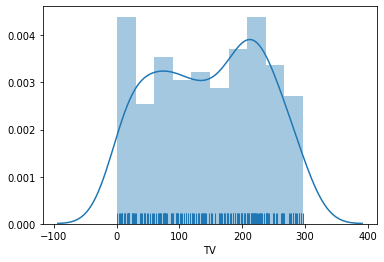

In [12]:
#univariate analysis
sns.distplot(df['TV'],bins=10,rug=True)

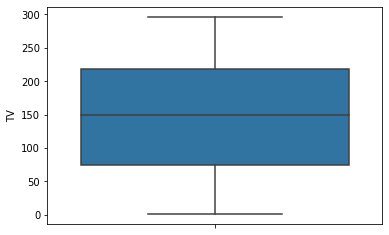

In [13]:
sns.boxplot(y=df['TV'])

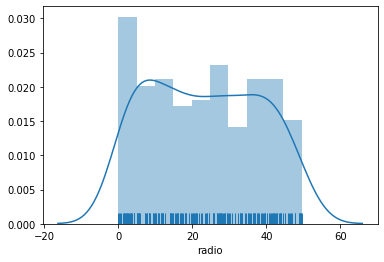

In [14]:
sns.distplot(df['radio'],bins=10,rug=True)

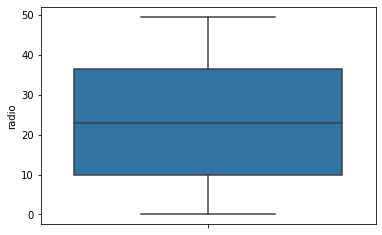

In [15]:
sns.boxplot(y=df['radio'])

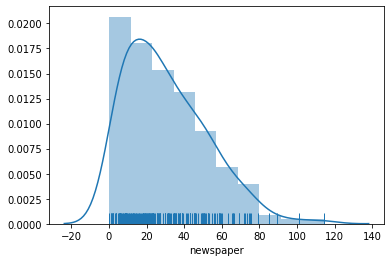

In [16]:
sns.distplot(df['newspaper'],bins=10,rug=True)

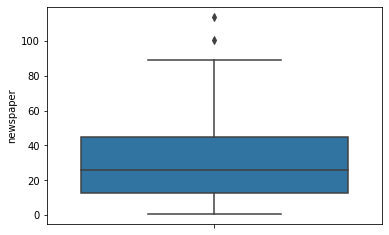

In [17]:
sns.boxplot(y=df['newspaper'])

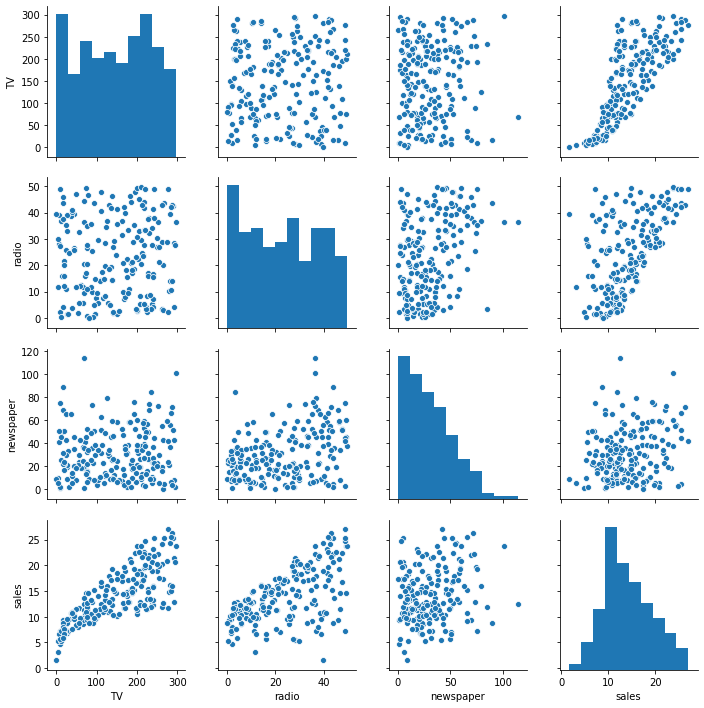

In [18]:
#bivariate analysis
sns.pairplot(df)

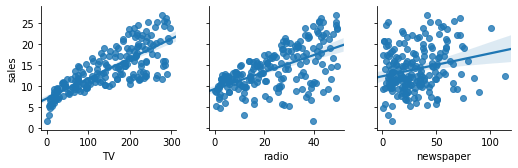

In [19]:
sns.pairplot(data=df, x_vars=['TV', 'radio', 'newspaper'],y_vars='sales',size=2.5, aspect=1, kind='reg')

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


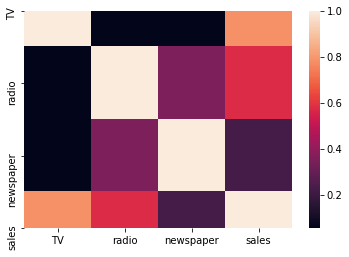

In [21]:
sns.heatmap(df.corr())

In [22]:
df1=df

In [23]:
df1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
df1.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [25]:
for x in df1.columns:
    if df1.skew().loc[x]>0.55:
        df1[x]=np.log1p(df1[x])

In [26]:
df1.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

In [27]:
from scipy.stats import zscore

In [28]:
z_score=abs(zscore(df1))
df1.shape

(200, 4)

In [29]:
df1_final=df1.loc[(z_score<3).all(axis=1)]

In [30]:
df1_final.shape

(199, 4)

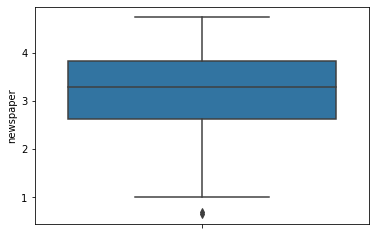

In [31]:
sns.boxplot(y=df1_final['newspaper'])

In [32]:
df1_final.skew()

TV          -0.063150
radio        0.090691
newspaper   -0.717354
sales        0.416327
dtype: float64

In [33]:
X=df1_final.drop(columns='sales',axis=1)
y=df1_final['sales']

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [35]:
MN=MinMaxScaler()
Sc=StandardScaler()

In [36]:
X_scaled=MN.fit_transform(X)
X_scaled

array([[0.77578627, 0.76209677, 0.87970402],
       [0.1481231 , 0.79233871, 0.77721137],
       [0.0557998 , 0.92540323, 0.88005095],
       [0.50997633, 0.83266129, 0.83939965],
       [0.60906324, 0.21774194, 0.83898969],
       [0.02705445, 0.9858871 , 0.8990517 ],
       [0.19208657, 0.66129032, 0.62314659],
       [0.4041258 , 0.39516129, 0.46107893],
       [0.02671627, 0.04233871, 0.01250117],
       [0.67331755, 0.05241935, 0.59912053],
       [0.2211701 , 0.11693548, 0.63001238],
       [0.72370646, 0.48387097, 0.23581905],
       [0.07811972, 0.70766129, 0.86796909],
       [0.32735881, 0.15322581, 0.35638615],
       [0.68785932, 0.66330645, 0.7819236 ],
       [0.65843761, 0.96169355, 0.81530899],
       [0.22691917, 0.73790323, 1.        ],
       [0.94927291, 0.7983871 , 0.82808132],
       [0.2316537 , 0.41330645, 0.56500293],
       [0.49577274, 0.48185484, 0.57490152],
       [0.73621914, 0.55846774, 0.81755942],
       [0.80047345, 0.10282258, 0.62314659],
       [0.

In [37]:
(pd.DataFrame(X_scaled)).skew()

0   -0.063150
1    0.090691
2   -0.717354
dtype: float64

In [38]:
X1_scaled=Sc.fit_transform(X)
X1_scaled

array([[ 9.79089948e-01,  9.78080220e-01,  1.28730630e+00],
       [-1.19319934e+00,  1.07912436e+00,  7.87741098e-01],
       [-1.51272249e+00,  1.52371859e+00,  1.28899730e+00],
       [ 5.91441612e-02,  1.21384989e+00,  1.09085648e+00],
       [ 4.02075606e-01, -8.40714347e-01,  1.08885829e+00],
       [-1.61220773e+00,  1.72580688e+00,  1.38160990e+00],
       [-1.04104546e+00,  6.41266412e-01,  3.68052853e-02],
       [-3.07195573e-01, -2.47922044e-01, -7.53137850e-01],
       [-1.61337814e+00, -1.42677037e+00, -2.93957598e+00],
       [ 6.24454358e-01, -1.39308899e+00, -8.03015175e-02],
       [-9.40389811e-01, -1.17752816e+00,  7.02702235e-02],
       [ 7.98846117e-01,  4.84741080e-02, -1.85108972e+00],
       [-1.43547514e+00,  7.96200764e-01,  1.23010841e+00],
       [-5.72879662e-01, -1.05627519e+00, -1.26342682e+00],
       [ 6.74782181e-01,  6.48002688e-01,  8.10709248e-01],
       [ 5.72956121e-01,  1.64497156e+00,  9.73434870e-01],
       [-9.20492764e-01,  8.97244906e-01

In [39]:
(pd.DataFrame(X1_scaled)).skew()

0   -0.063150
1    0.090691
2   -0.717354
dtype: float64

In [40]:
X1=pd.DataFrame(data=X_scaled,index=None,columns=X.columns)

In [41]:
X1.shape

(199, 3)

In [42]:
X1.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.879704
1,0.148123,0.792339,0.777211
2,0.055800,0.925403,0.880051
3,0.509976,0.832661,0.839400
4,0.609063,0.217742,0.838990


In [43]:
y1=pd.DataFrame(y)

In [44]:
y1.shape

(199, 1)

In [45]:
y1.head()


,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#train_X,test_X,train_y,test_y=train_test_split(X,y, random_state=61,test_size=.25)

In [50]:
#lr=LinearRegression()

In [51]:
#lr.fit(train_X,train_y)

In [52]:
#lr.score(train_X,train_y)

In [53]:
#predict=lr.predict(test_X)

In [54]:
#r2_scor=r2_score(test_y,predict)
#r2_scor

In [55]:
#print('MSE=', mean_squared_error(test_y,predict)*100)

In [56]:
#from sklearn.ensemble import RandomForestRegressor

In [57]:
#Reg=RandomForestRegressor(max_depth=12,n_estimators=10)

In [58]:
#Reg.fit(train_X,train_y)

In [59]:
#Reg.score(train_X,train_y)

In [60]:
#predict2=Reg.predict(test_X)

In [61]:
#r2_scor2=r2_score(test_y,predict2)
#r2_scor2

In [62]:
#print('MSE=', mean_squared_error(test_y,predict2)*100)

In [63]:
#from sklearn.ensemble import GradientBoostingRegressor

In [64]:
#GB=GradientBoostingRegressor(random_state=96,n_estimators=200,subsample=0.7)

In [65]:
#GB.fit(train_X,train_y)

In [66]:
#predict3=GB.predict(test_X)

In [67]:
#r2_scor3=r2_score(test_y,predict3)
#r2_scor3

In [68]:
#print('MSE=', mean_squared_error(test_y,predict3)*100)

In [69]:
#from sklearn.neighbors import KNeighborsRegressor as KNN

In [70]:
#kl=KNN(n_neighbors=7)

In [71]:
#kl.fit(train_X,train_y)

In [72]:
#predict4=kl.predict(test_X)

In [73]:
#r2_scor4=r2_score(test_y,predict4)
#r2_scor4

In [74]:
#print('MSE=', mean_squared_error(test_y,predict4)*100)

In [137]:
train_X,test_X,train_y,test_y=train_test_split(X1,y1,test_size=.30,random_state=120)

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [139]:
LR=LinearRegression()
DTR=DecisionTreeRegressor(random_state=7)
KN=KNeighborsRegressor(n_neighbors=7)
SVMR=SVR()
RFR=RandomForestRegressor(n_estimators=12,max_depth=12)
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()

In [140]:
model_list=[]

In [141]:
model_list.append(('LinearRegression', LR))

In [142]:
model_list.append(('DecisionTreeRegressor', DTR))

In [143]:
model_list.append(('KNeighborsRegressor', KN))

In [144]:
model_list.append(('SVR', SVMR))

In [145]:
model_list.append(('RandomForestRegressor', RFR))

In [146]:
model_list.append(('AdaBoostingRegressor', ABR))

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
Model=[]
MAE=[]
MSA=[]
CS=[]
r2_scor=[]

for name,model in model_list:
    print('**************************************',name,'***********************************************')
    Model.append(name)
    model.fit(train_X,train_y)
    print(model)
    pred=model.predict(test_X)
    print('\n')
    Abs=mean_absolute_error(pred,test_y)
    print('mean absolue error is:',Abs)
    MAE.append(Abs*100)
    print('\n')
    ms=mean_squared_error(pred,test_y)
    print('mean squared error is:',ms)
    MSA.append(ms*100)
    print('\n')
    cs=cross_val_score(model,X=train_X,y=train_y, cv=10,scoring='r2').mean()
    print('cross_val is',cs)
    CS.append(cs*100)
    print('\n')
    r=r2_score(pred,test_y)
    print('r2_scor is :',r)
    r2_scor.append(r*100)
    
    



************************************** LinearRegression ***********************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


mean absolue error is: 1.308393043013391


mean squared error is: 2.9763235006669633


cross_val is 0.8657146706793014


r2_scor is : 0.8862159500109167
************************************** DecisionTreeRegressor ***********************************************
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=7, splitter='best')


mean absolue error is: 0.8566666666666668


mean squared error is: 1.0696666666666668


cross_val is 0.9178270934630861


r2_scor is : 0.9661641698522121
************************************** KNe

In [149]:
best_model=pd.DataFrame({'Model': Model,'Mean Absolute Error': MAE,'Mean Squared Error': MSA,
                         'CV_Score':CS,'R2_score':r2_scor})

In [150]:
best_model

,Model,Mean Absolute Error,Mean Squared Error,CV_Score,R2_score
0,LinearRegression,130.839304,297.632350,86.571467,88.621595
1,DecisionTreeRegressor,85.666667,106.966667,91.782709,96.616417
2,KNeighborsRegressor,115.619048,250.165306,90.561659,88.527173
3,SVR,168.963401,559.036809,79.654714,56.621197
4,RandomForestRegressor,66.236111,66.784838,96.508714,97.690660
5,AdaBoostingRegressor,96.153403,136.393646,93.008070,94.730746


I am selecting Random Forest Regressor as my final model as it has least MSE and very good CV and R2_score


In [153]:
#using gridsearchcv to tune parameters of Random forest
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
    }

In [157]:
grid_search=GridSearchCV(estimator= RFR,param_grid= param_grid,
                        scoring='r2', cv=10, n_jobs=-1)

In [158]:
grid_search=grid_search.fit(train_X,train_y)

In [159]:
score=grid_search.best_score_

In [160]:
score

0.9548328324031127

In [161]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

In [162]:
#saving the model
from sklearn.externals import joblib

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [164]:
joblib.dump(RFR,'RFR_joblib')

['RFR_joblib']